# Using the pyuplift package for uplift prediction on the Hillstrom's MineThatData E-Mail Analytics And Data Mining Challenge dataset

## Introduction

The Hillstrom's MineThatData E-Mail Analytics And Data Mining Challenge dataset contains 64,000 customers involved in an e-mail campaign.
The customers are randomly divided into three equal groups:

* the first group receives an e-mail campaign on Mens merchandise;
* the second group receives an e-mail campaign on Womens merchandise;
* the third group does not receive any campaign.

Since the customers receiving a treatment have the same probability of belonging to one of the three segments, the propensity score is known.

In this test we consider only one e-mail campaign at a time, therefore we exclude the individuals having received the other treatment.
This means that the propensity score of each customer is 0.5.

## Variable transformation

We test here multiple approaches to the variable transformation method:

* Lai
* Kane
* Jaskowski
* Pessimistic
* Reflective


In [15]:
import pandas as pd
from pyuplift.transformation import Lai, Kane, Jaskowski, Pessimistic, Reflective

%matplotlib inline

In [16]:
from datasets import HillstromDataset

### Loading the data

We choose which campaign to analyze by changing the *campaign* parameter of *getCampaignData*. By choosing 1, we target
the Mens campaign, while by choosing 2 we target the Womens campaign.

We define the following vectors:
* y, the outcome
* X, the features
* w, the treatment indicator
* p, the propensity score

We split the data into a train set and a test set. In this test, the two sets have equal size.

In [17]:
data = HillstromDataset()
y_train, X_train, w_train, y_test, X_test, w_test = data.getTrainTest(campaign=1)

### Estimation

In [18]:
model_lai = Lai()
model_lai.fit(X_train, y_train, w_train)
pred_1 = model_lai.predict(X_test)

model_kane = Kane()
model_kane.fit(X_train, y_train, w_train)
pred_2 = model_kane.predict(X_test)

model_jaskowski = Jaskowski()
model_jaskowski.fit(X_train, y_train, w_train)
pred_3 = model_jaskowski.predict(X_test)

model_pess = Pessimistic()
model_pess.fit(X_train, y_train, w_train)
pred_4 = model_pess.predict(X_test)

model_refl = Reflective()
model_refl.fit(X_train, y_train, w_train)
pred_5 = model_refl.predict(X_test)


### Uplift curve

The pyuplift package does not contain any methods for plotting the uplift curve and estimating the area under the curve.
We will therefore use the dedicated functions from CausalML.

In [19]:
from causalml.metrics import plot_gain, auuc_score
import matplotlib.pyplot as plt

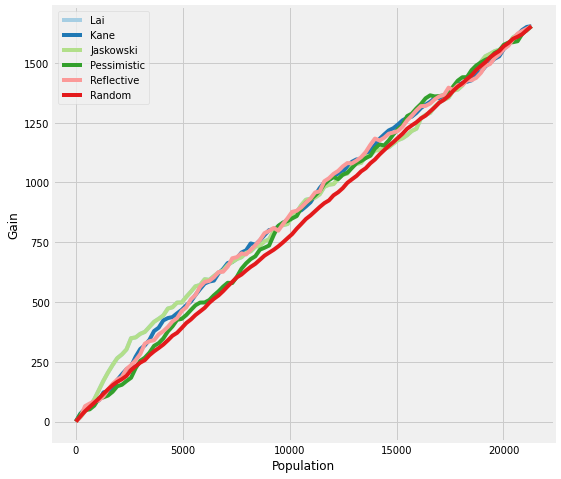

In [20]:
df = pd.DataFrame({'y': y_test, 'w': w_test, 'Lai': pred_1, 'Kane': pred_2, 'Jaskowski': pred_3,
                   'Pessimistic': pred_4, 'Reflective': pred_5})
plot_gain(df, outcome_col='y', treatment_col='w')
plt.show()

In [21]:
print("Area under the uplift curves:")
auuc_score(df, outcome_col='y', treatment_col='w')

Area under the uplift curves:


Lai            0.537403
Kane           0.535283
Jaskowski      0.537403
Pessimistic    0.523539
Reflective     0.534727
Random         0.506580
dtype: float64

## Comparison between the two campaigns

For comparison, we repeat here the same steps by chosing the Womens campaign.

In [22]:
data = HillstromDataset()
y_train, X_train, w_train, y_test, X_test, w_test = data.getTrainTest(campaign=2)

### Estimation

In [23]:
model_lai = Lai()
model_lai.fit(X_train, y_train, w_train)
pred_1 = model_lai.predict(X_test)

model_kane = Kane()
model_kane.fit(X_train, y_train, w_train)
pred_2 = model_kane.predict(X_test)

model_jaskowski = Jaskowski()
model_jaskowski.fit(X_train, y_train, w_train)
pred_3 = model_jaskowski.predict(X_test)

model_pess = Pessimistic()
model_pess.fit(X_train, y_train, w_train)
pred_4 = model_pess.predict(X_test)

model_refl = Reflective()
model_refl.fit(X_train, y_train, w_train)
pred_5 = model_refl.predict(X_test)


### Uplift curve

In [24]:
from causalml.metrics import plot_gain, auuc_score
import matplotlib.pyplot as plt

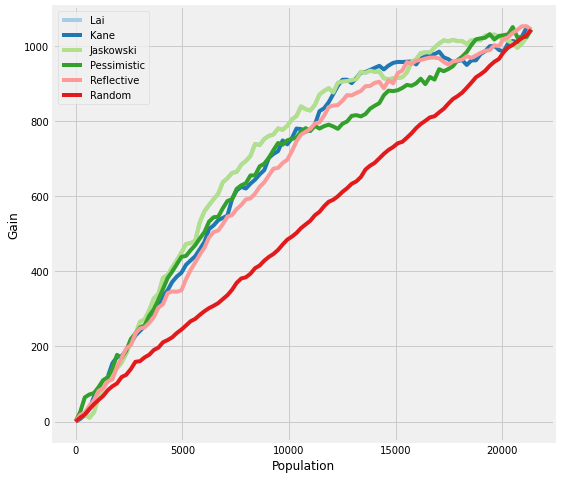

In [25]:
df = pd.DataFrame({'y': y_test, 'w': w_test, 'Lai': pred_1, 'Kane': pred_2, 'Jaskowski': pred_3,
                   'Pessimistic': pred_4, 'Reflective': pred_5})
plot_gain(df, outcome_col='y', treatment_col='w')
plt.show()

In [26]:
print("Area under the uplift curves:")
auuc_score(df, outcome_col='y', treatment_col='w')

Area under the uplift curves:


Lai            0.676798
Kane           0.651615
Jaskowski      0.676798
Pessimistic    0.640945
Reflective     0.635594
Random         0.500102
dtype: float64